# Arbre de décision

In [12]:
import os
import sys
import numpy as np 
import math
import pandas as pd

In [13]:
datas = pd.read_csv("../csv/predict_data.csv")
datas.head(5)

_id                 user_created_at  nb_pub_tweets  nb_follower  \
0   4395  Tue Aug 15 20:56:32 +0000 2006           4205         2983   
1   5199  Sat Sep 02 21:22:40 +0000 2006          24655          600   
2   5549  Fri Sep 08 06:50:35 +0000 2006          30467        19894   
3  10997  Sun Oct 29 15:50:38 +0000 2006         101975        10383   
4  12997  Sat Nov 18 19:02:52 +0000 2006          17073          463   

   nb_profil_suivi  nb_moyen_URL  nb_moyen_hashtage  mention_avg  \
0              549           0.0           3.000000     1.000000   
1             1665           1.0           2.000000     1.000000   
2             1193           1.0           1.666667     0.333333   
3             4175           0.0           1.000000     1.000000   
4              505           0.0           1.000000     0.333333   

   nb_moyen_retweets  nb_moyen_reponse  longueur_moyen_des_tweets  \
0                0.0               0.0                 103.000000   
1                0.0               0.0                  87.000000   
2                0.0               0.0                 101.666667   
3                0.0               0.0                 102.000000   
4                0.0               0.0                  62.666667   

   ratio_follower_followee  freq_friend  freq_tweet  Agressivite  Visibilite  \
0                 5.433515     0.127050    0.973126     0.003143    0.492857   
1                 0.360360     0.386930    5.729578     0.017476    0.328571   
2                16.675608     0.277589    7.089116     0.021048    0.273810   
3                 2.486946     0.983200   24.014800     0.071423    0.164286   
4                 0.916832     0.119493    4.039793     0.011884    0.164286   

     Danger  label  
0  0.000000      1  
1  0.000000      0  
2  0.333333      0  
3  0.000000      0  
4  0.000000      0

In [14]:
X = datas.iloc[:,14:17]
Y = datas.iloc[:,17]

In [15]:
feature_names = list(datas.columns[14:17])
target_names = ["0","1","2","3"]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

In [17]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [18]:
clf = tree.DecisionTreeClassifier(max_depth=3)

In [19]:
clf = clf.fit(X_train,y_train)
score = clf.score(X_test, y_test)
print(score)

0.9613040714846525


In [20]:
import graphviz
import pydotplus 

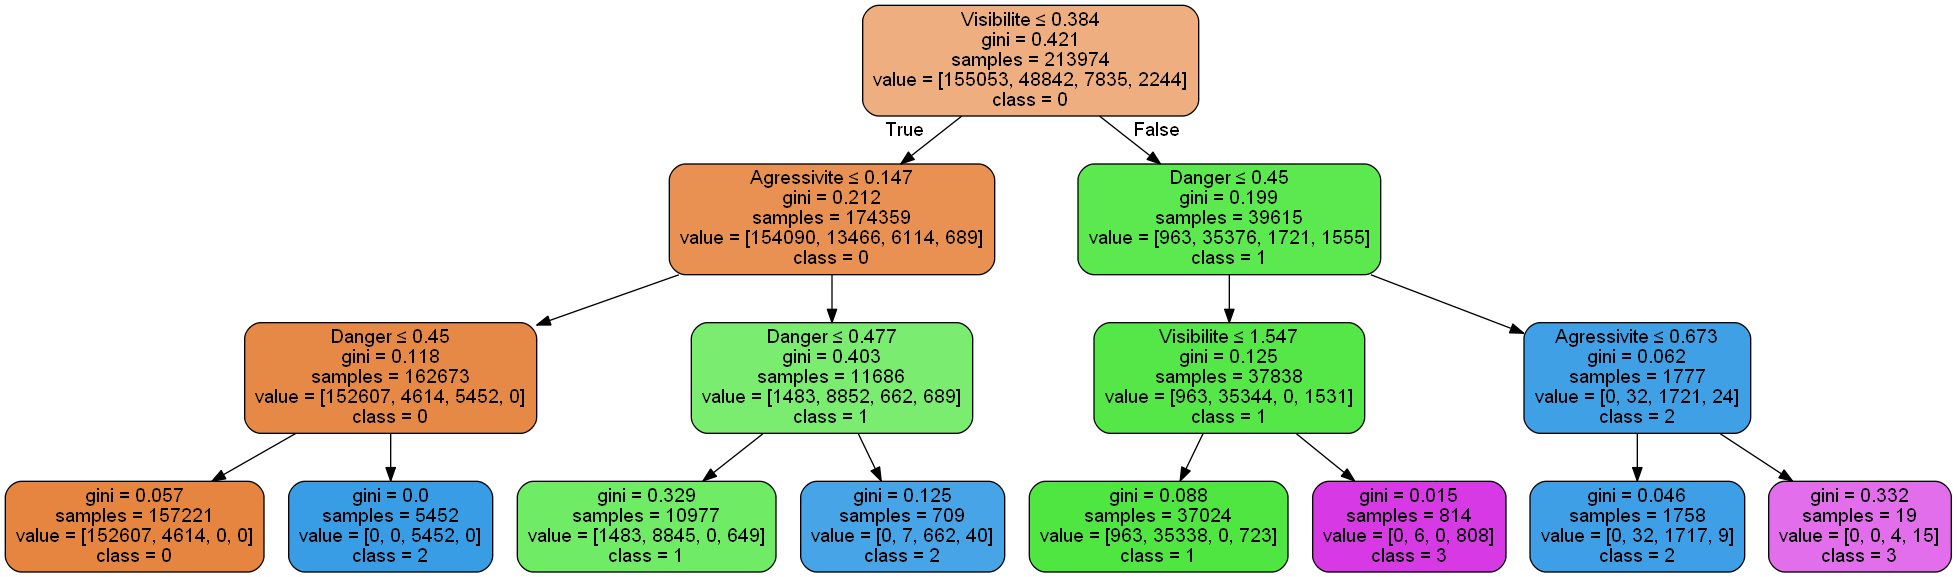

In [22]:
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=feature_names,  
                         class_names=target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 